This notebook is part of a series intended to review the contents in the __IBM Certified Associate Developer - Quantum Computation using Qiskit v0.2X__ exam as indicated in the [exam's official webpage](https://www.ibm.com/training/certification/C0010300) (See §Exam objectives). It is not intended, however, to furnish a complete preparation, but a guided overview with basic explanations and examples. The reader is encouraged to consult other sources and work on codes and examples as much as possible in order to prepare suitably.

# Section 5: Comparing and contrasting quantum information

In this section we review some basic concepts of quantum information theory and introduce their implementations in Qiskit.

## 5.1 Using classical and quantum registers

### 5.1.1 Classical registers

Usually in physics the term "classical" refers to theories that predate the discovery of quantum mechanics. Let us introduce the concept of a system in the context of classical information theory.

__Def. 1__ *A system S is an abstraction of a physical device or a medium that can store information. We denote by $\Sigma$* the set of all possible states of S.

Let us assume from now on that $\Sigma$ is always *discrete* and *nonempty*.

The most important example of a classical system for us is perhaps a *classical bit*, where $\Sigma = \{0, 1\}$. Their main purpose in quantum computing is to store the measurement results of quantum bits (see below), and we already know from §1.1 and §1.2 how to implement them in a quantum circuit.

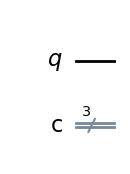

In [10]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit

# Creating a quantum circuit of 1 quantum register and 3 classical registers

qr = QuantumRegister(1, name = 'q')
cr = ClassicalRegister(3, name = 'c')

qc = QuantumCircuit(qr, cr)

qc.draw('mpl')

Other classical systems are, for example, a six-sided die ($\Sigma = \{1, 2, 3, 4, 5, 6\}$), a coin ($\Sigma = \{heads, tails\}$), or even an electric fan switch $\Sigma = \{high, medium, low, off\}$.

For us, the most important property of a classical system is that its state is defined independently of whether we measure it or not. For example, we can say that we know that the state of a classical bit inside a box is either 0 or 1 even if we haven't opened the box yet.

However, before knowing (or measuring) the state of classical system, all we can say is that there is a certain probability of a certain outcome to occur. For example, after flipping a honest coin, if we don't look at the final result all we can say beforehand is that there is a probability of $1/2$ of measuring "$heads$" and a probability of $1/2$ of measuring tails.

A convenient tool is to assign orthonormal basis vectors to each classical state of a given system. For the coin of the last example we could assign, for example, $heads \to |heads\rangle$ and $tails \to |tails\rangle$ so that $\langle  heads | heads \rangle = \langle tails | tails \rangle = 1$ and $\langle heads | tails \rangle = 0$. We may say then that the state of the coin before a measurement is the *probabilistic state*

\begin{equation}
    \frac{1}{2} |heads\rangle + \frac{1}{2} |tails\rangle \equiv
    \begin{pmatrix}
        1/2\\
        1/2
    \end{pmatrix}
\end{equation}

and represent a measurement by a *projection operation* on the state of the circuit.

This was an example, but we can give a more general definition of a probabilistic state.

__Def. 2__ 